In [1]:
import os
import glob
import urllib.parse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# FWAF Malicious Queries Dataset
https://github.com/faizann24/Fwaf-Machine-Learning-driven-Web-Application-Firewall

In [2]:
# Dataset paths
dataset_base_path = r"D:\\dev\\CyberML\\Datasets\\FWAF"

queries_raw = []
for fn in glob.glob(os.path.join(dataset_base_path, "*.txt")):
    queries_raw.append(os.path.normpath(fn))

# Make sure files get added in specific order
queries_raw.sort(reverse=True)
mapping_label = {0:"good", 1:"bad"}

print(queries_raw)
print(mapping_label)

['D:\\dev\\CyberML\\Datasets\\FWAF\\goodqueries.txt', 'D:\\dev\\CyberML\\Datasets\\FWAF\\badqueries.txt']
{0: 'good', 1: 'bad'}


In [3]:
def ends(df, x=5):
    '''Get the head and tail of a dataframe'''
    return df.head(x).append(df.tail(x))

raw_urls = []
for idx, fn in enumerate(queries_raw):
    with open(fn,'r', encoding='utf-8') as f:
        data = f.readlines()
        data = [(str(urllib.parse.unquote(d)), idx) for d in data]
        raw_urls.extend(data)

# Create dataframe with columns for URL and label
urldata = pd.DataFrame(raw_urls, columns=['url', 'label'])
urldata['url'] = urldata['url'].apply(lambda x: x.strip("\n"))
# Convert gt column according to mapping
# urldata['label'] = urldata['label'].apply(lambda x: mapping_label[x])
only_once_flag = 1

# View Dataset information and what the samples look like
print(urldata.info())
display(urldata.groupby('label').count())
display(ends(urldata))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342657 entries, 0 to 1342656
Data columns (total 2 columns):
url      1342657 non-null object
label    1342657 non-null int64
dtypes: int64(1), object(1)
memory usage: 20.5+ MB
None


,url
label,
0,1294531
1,48126


,url,label
0,/103886/,0
1,/rcanimal/,0
2,/458010b88d9ce/,0
3,/cclogovs/,0
4,/using-localization/,0
1342652,"""text </script><script>alert(1)</script>""",1
1342653,<marquee loop=1 width=0 onfinish=1/confirm`/1/...,1
1342654,<marquee loop=1 width=0 onfinish=confirm(1)>0<...,1
1342655,<abeon style=font-size:12px onmouseover=confir...,1
1342656,<svg onload=location='//p0.al'>,1


In [4]:
# Create new columns to count specific features in each sample and use them for our ML classifier
if only_once_flag:
    urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))
    urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
    urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
    urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
    urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
    urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
    urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
    urldata['count<'] = urldata['url'].apply(lambda i: i.count('<'))
    urldata['count>'] = urldata['url'].apply(lambda i: i.count('>'))
    urldata['count/'] = urldata['url'].apply(lambda i: i.count('/'))
    urldata['count\\'] = urldata['url'].apply(lambda i: i.count('\\'))
    urldata['count<'] = urldata['url'].apply(lambda i: 1 if i.count('<') > 3 else 0)

    # Count number of non alphanumeric characters in url
    urldata["count_non_alphanum"] = urldata.apply(lambda p: sum( not q.isalnum() for q in p["url"] ), axis=1)
    
    only_once_flag = 0

In [5]:
display(ends(urldata))
# column_to_display = 'count_non_alphanum'
# column_to_display = 'count@'
# grouped_data = urldata.groupby(['label',]).agg({column_to_display: 'sum'})
# grouped_data["%"] = grouped_data.apply(lambda x:  100*x / x.sum())
# grouped_data = grouped_data.reset_index()
# grouped_data

# Display total sum of each column by class
grouped_data = urldata.groupby(['label',]).agg('sum')
display("Sum", grouped_data)
# Display percentages of total
display("Percentage", grouped_data.apply(lambda x:  100*x / x.sum()))
# Display average number
display("Mean", urldata.groupby(['label',]).agg('mean'))
# display(urldata.groupby(['label',]).agg(['mean', 'sum']))

,url,label,url_length,count-,count@,count?,count%,count.,count=,count<,count>,count/,count\,count_non_alphanum
0,/103886/,0,8,0,0,0,0,0,0,0,0,2,0,2
1,/rcanimal/,0,10,0,0,0,0,0,0,0,0,2,0,2
2,/458010b88d9ce/,0,15,0,0,0,0,0,0,0,0,2,0,2
3,/cclogovs/,0,10,0,0,0,0,0,0,0,0,2,0,2
4,/using-localization/,0,20,1,0,0,0,0,0,0,0,2,0,3
1342652,"""text </script><script>alert(1)</script>""",1,41,0,0,0,0,0,0,0,3,2,0,13
1342653,<marquee loop=1 width=0 onfinish=1/confirm`/1/...,1,59,0,0,0,0,0,3,0,2,4,0,16
1342654,<marquee loop=1 width=0 onfinish=confirm(1)>0<...,1,55,0,0,0,0,0,3,0,2,1,0,13
1342655,<abeon style=font-size:12px onmouseover=confir...,1,56,1,0,0,0,0,2,0,1,0,0,10
1342656,<svg onload=location='//p0.al'>,1,31,0,0,0,0,1,2,0,1,2,0,10


'Sum'

,url_length,count-,count@,count?,count%,count.,count=,count<,count>,count/,count\,count_non_alphanum
label,,,,,,,,,,,,
0,21473066,186372,3410,62257,133,324927,38461,0,14,2685663,22843,3854740
1,2877116,22633,488,27690,10574,114922,52242,691,29131,126537,20602,840323


'Percentage'

,url_length,count-,count@,count?,count%,count.,count=,count<,count>,count/,count\,count_non_alphanum
label,,,,,,,,,,,,
0,88.184417,89.171072,87.480759,69.215205,1.242178,73.872397,42.403228,0.0,0.048036,95.500427,52.579123,82.101987
1,11.815583,10.828928,12.519241,30.784795,98.757822,26.127603,57.596772,100.0,99.951964,4.499573,47.420877,17.898013


'Mean'

,url_length,count-,count@,count?,count%,count.,count=,count<,count>,count/,count\,count_non_alphanum
label,,,,,,,,,,,,
0,16.587526,0.143969,0.002634,0.048092,0.000103,0.25100,0.029710,0.000000,0.000011,2.074622,0.017646,2.977712
1,59.782986,0.470286,0.010140,0.575365,0.219715,2.38794,1.085525,0.014358,0.605307,2.629286,0.428085,17.460894


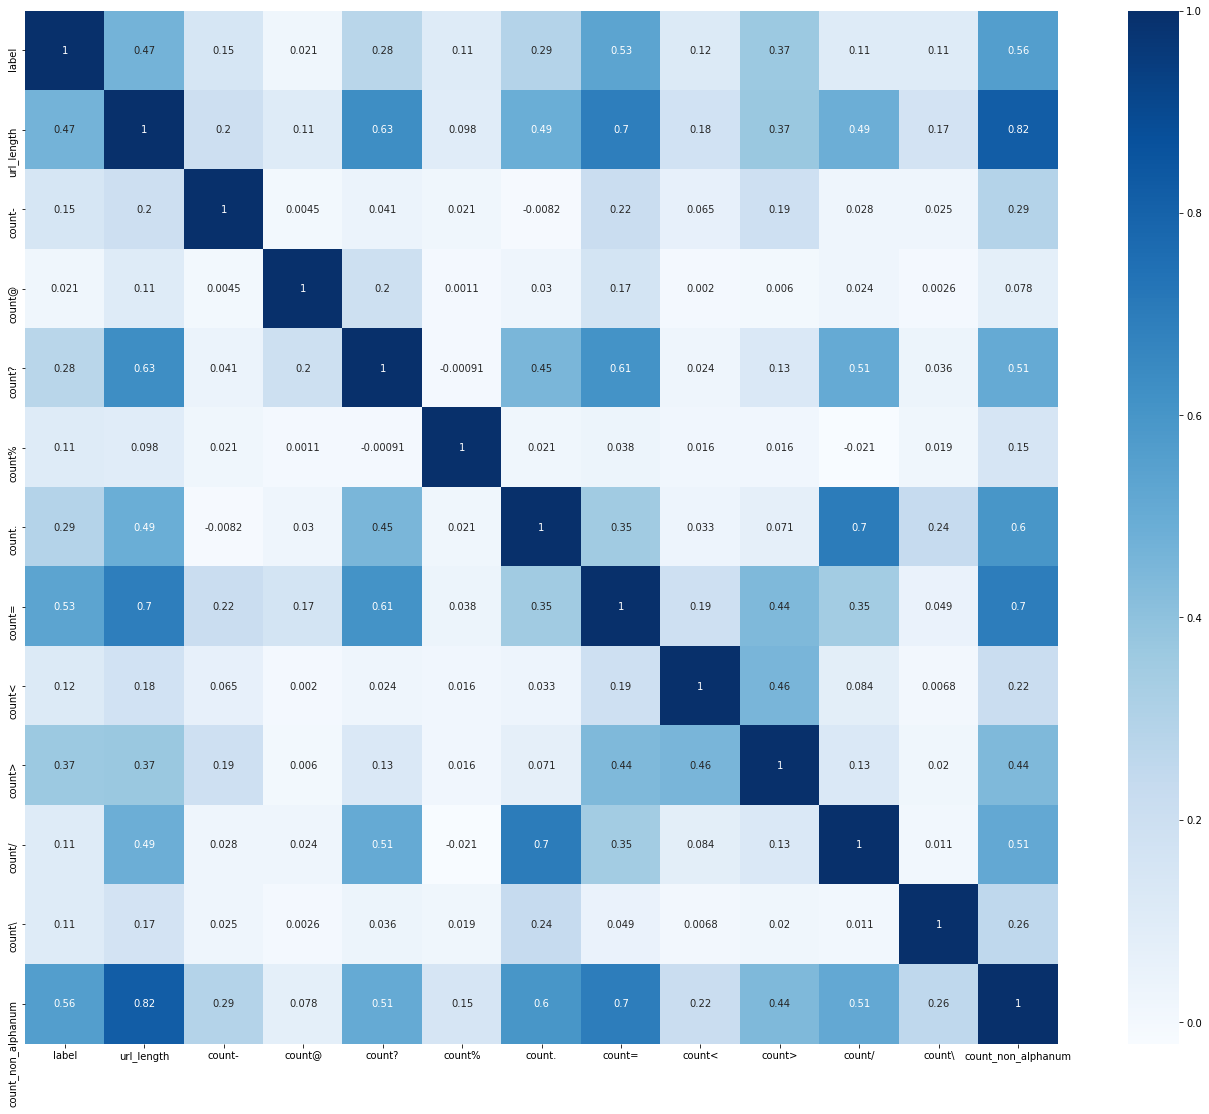

In [6]:
# Correlation Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10}, cmap='Blues')

plt.show()